# Student Exam Score Prediction

## Table of Contents
1. [Project Overview](#-project-overview)  
2. [Data Exploration](#-data-exploration)  
   - Dataset Structure  
   - Exam Score Distribution  
   - Correlation Analysis  
   - Categorical Impact (Gender & School Type)  
   - Study Hours vs. Exam Score  
3. [Data Preparation](#-data-preparation)  
   - Handling Missing Values  
   - Encoding Categorical Variables  
   - Train-Test Split  
4. [Modeling & Evaluation](#-modeling--evaluation)  
   - Linear Regression  
   - Polynomial Regression  
   - Model Performance Metrics (MAE, RMSE, R²)  
5. [Results & Visualization](#-results--visualization)  
   - Actual vs Predicted Scores  
   - Model Comparison  
6. [Conclusion & Recommendations](#-conclusion--recommendations)  
   - Key Insights  
   - Practical Recommendations for Students, Teachers, and Parents  

---

# Project Overview

This section introduces the main goal of the project: to predict students’ exam scores based on study hours and other performance factors. It outlines the motivation behind the analysis and explains why predicting exam outcomes is useful for students, teachers, and schools.


# Import librairies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Load & Explore the Data

Here, we take the first look at the dataset. We check its structure, preview some rows, and analyze the distribution of exam scores. Correlations and categorical impacts are explored to see which factors (like study hours, attendance, or gender) influence exam performance the most.

In [4]:
# Load and check columns
student_performance_factors = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
student_performance_factors.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [5]:
# Check first few rows
print("1. First 5 rows of the dataset:")
display(student_performance_factors.head())

# Dataset shape
print("\n2. Dataset shape (rows, columns):")
print(student_performance_factors.shape) 

# Info summary
print("\n3. Dataset information:")
print(student_performance_factors.info())

# Basic statistics for numeric columns
print("\n4. Basic statistics for numeric columns:")
display(student_performance_factors.describe())

# Check missing values
print("\n5. Missing values count per column:")
print(student_performance_factors.isnull().sum())

# Check unique values in categorical columns
print("\n6: Unique values in categorical columns:")
categorical_cols = student_performance_factors.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {student_performance_factors[col].nunique()} unique values")
    print(student_performance_factors[col].value_counts().head())

1. First 5 rows of the dataset:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



2. Dataset shape (rows, columns):
(6607, 20)

3. Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000



5. Missing values count per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

6: Unique values in categorical columns:

Parental_Involvement: 3 unique values
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

Access_to_Resources: 3 unique values
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, d

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


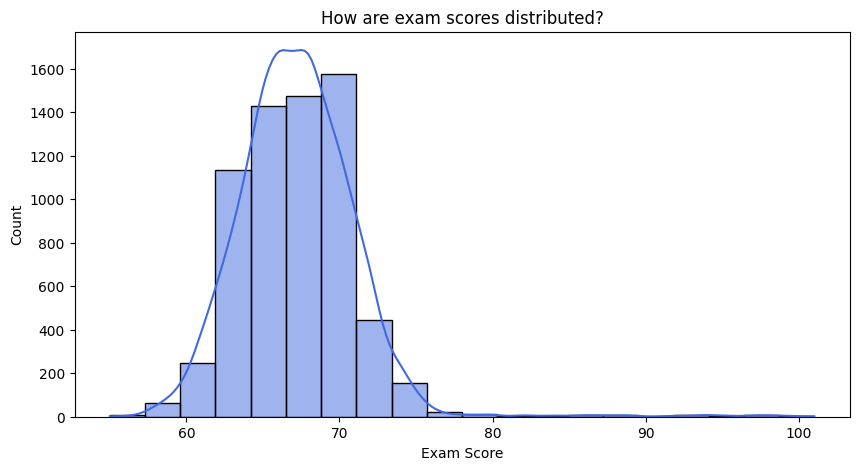

In [6]:
#Distribution of Exam Scores
plt.figure(figsize=(10, 5))
sns.histplot(student_performance_factors['Exam_Score'], kde=True, bins=20, color='royalblue')
plt.title('How are exam scores distributed?')
plt.xlabel('Exam Score')
plt.show()

The majority of exam scores are concentrated between 60 and 72, following a distribution close to normal. The blue dot on the right represents an outlier value that is well above average.

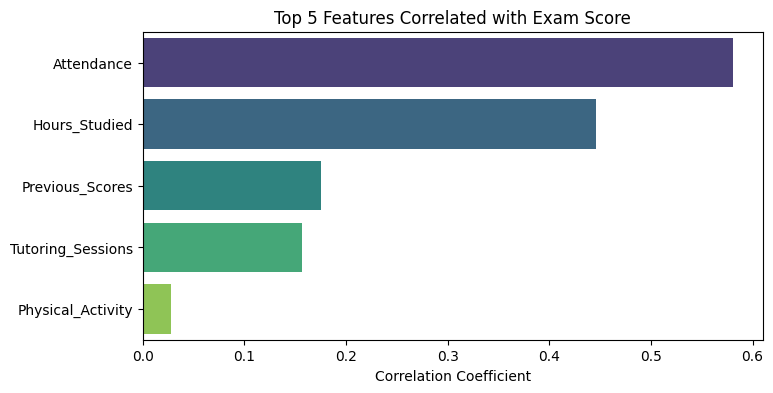

In [7]:
#Top 5 Correlations with Exam Score

corr = student_performance_factors.corr(numeric_only=True)['Exam_Score'].sort_values(ascending=False)[1:6]
plt.figure(figsize=(8, 4))
sns.barplot(x=corr.values, y=corr.index, palette='viridis')
plt.title('Top 5 Features Correlated with Exam Score')
plt.xlabel('Correlation Coefficient')
plt.show()


The graph shows that attendance (Attendance) and hours of study (Hours_Studied) are the factors most positively correlated with exam scores. Other variables such as previous scores, tutoring sessions and physical activity have a lower impact.

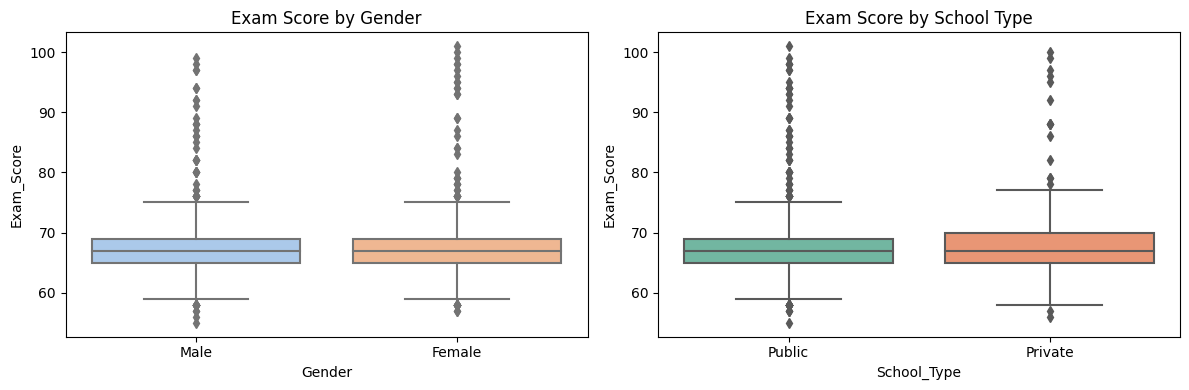

In [8]:
#Categorical Impact: Exam Score by Gender & School Type

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Exam_Score', data=student_performance_factors, palette='pastel')
plt.title('Exam Score by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='School_Type', y='Exam_Score', data=student_performance_factors, palette='Set2')
plt.title('Exam Score by School Type')
plt.tight_layout()
plt.show()

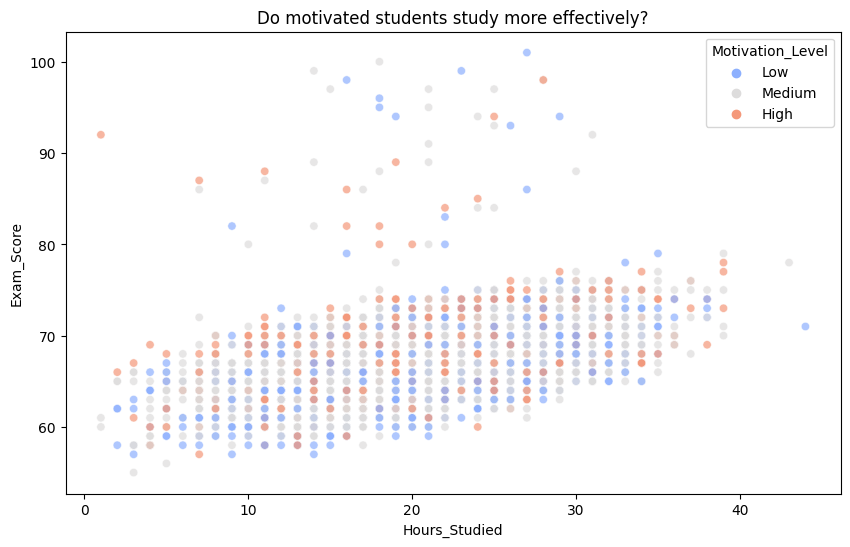

In [9]:
# Study Hours vs. Exam Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Motivation_Level', 
                data=student_performance_factors, palette='coolwarm', alpha=0.7)
plt.title('Do motivated students study more effectively?')
plt.show()

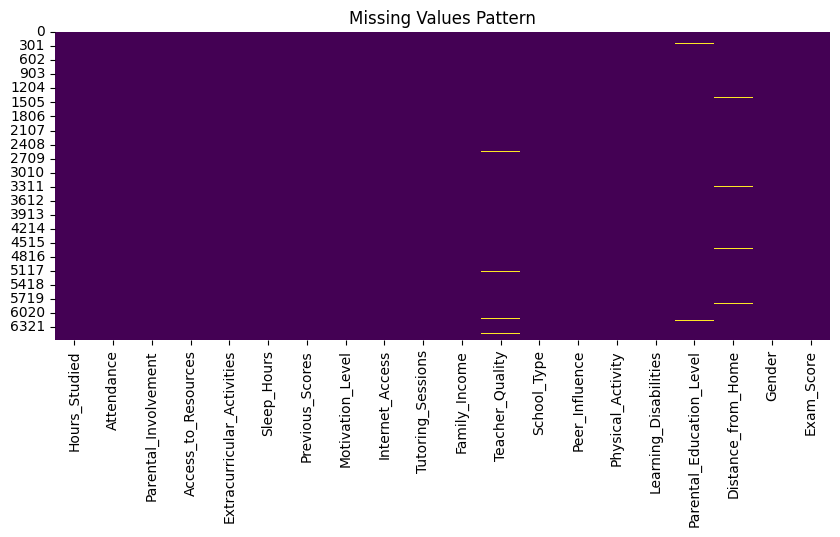

In [10]:
#Missing Data Heatmap 

if student_performance_factors.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 4))
    sns.heatmap(student_performance_factors.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Pattern')
    plt.show()
else:
    print("No missing values found!")

# Data cleaning & Visualization

This part explains how missing values and categorical variables were handled. It also covers data transformations such as encoding, and describes how the dataset was split into training and testing sets for building machine learning models.

In [11]:
# Fill missing categorical values with mode
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    student_performance_factors[col].fillna(student_performance_factors[col].mode()[0], inplace=True)

# Encode categorical variables
student_performance_factors_encoded = pd.get_dummies(student_performance_factors, drop_first=True)

print("Data after encoding:")
display(student_performance_factors_encoded.head())


Data after encoding:


/tmp/ipykernel_36/1592247002.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_performance_factors[col].fillna(student_performance_factors[col].mode()[0], inplace=True)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


# Data splitting

In [12]:
# Features & target
X = student_performance_factors_encoded.drop('Exam_Score', axis=1)
y = student_performance_factors_encoded['Exam_Score']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (5285, 27), Test set: (1322, 27)


# Model evaluation & Evaluation Function

In this section, we build and test predictive models. Both Linear Regression and Polynomial Regression are applied to the dataset. Their performance is compared using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score.

In [13]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2, y_pred


# Model training

In [14]:
lr_model = LinearRegression()
mae, rmse, r2, y_pred_lr = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

print(f"Linear Regression:\n MAE: {mae:.2f}\n RMSE: {rmse:.2f}\n R²: {r2:.3f}")


Linear Regression:
 MAE: 0.45
 RMSE: 1.80
 R²: 0.770


# Polynomial Regression (Degree 2)

In [15]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
mae_poly, rmse_poly, r2_poly, y_pred_poly = evaluate_model(poly_model, X_train_poly, y_train, X_test_poly, y_test)

print(f"Polynomial Regression (Degree 2):\n MAE: {mae_poly:.2f}\n RMSE: {rmse_poly:.2f}\n R²: {r2_poly:.3f}")


Polynomial Regression (Degree 2):
 MAE: 0.64
 RMSE: 1.89
 R²: 0.747


# Prediction Visualization

This part presents the evaluation results in a visual format. Actual vs. predicted exam scores are compared using scatter plots, showing how well each model captures the relationship between study hours and exam performance.

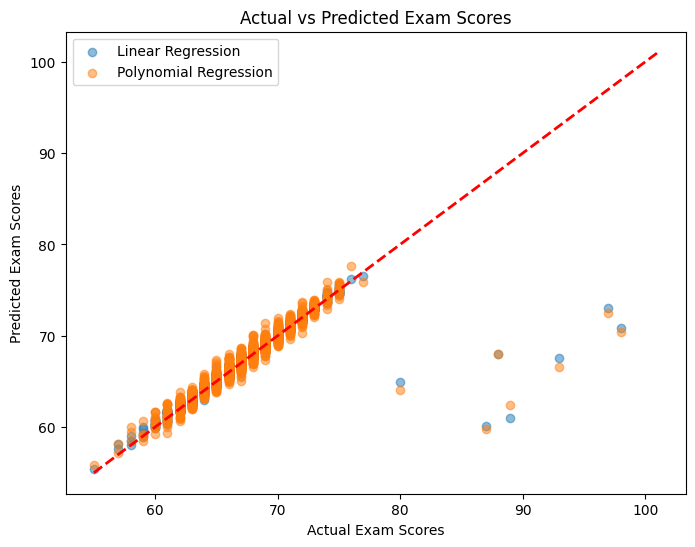

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_poly, alpha=0.5, label='Polynomial Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.legend()
plt.show()


# Conclusion & Recommendations

The findings are summarized, highlighting the most important predictors of student performance (study hours, attendance, motivation). Recommendations are provided for students, teachers, and parents to improve academic success using the insights gained from the analysis.